<a href="https://colab.research.google.com/github/annykay/AppliedStatistics/blob/main/homework1_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this homework, you need to solve two tasks. For problems with theoretical calculations, you need to show a sufficient number of intermediate steps to explain how you have obtained the result. 
* Formulas are expected in Latex style inside the notebook. The assignment should be uploaded in Jupyter Notebook format(`.ipynb`). 
* Overall, there are 45 points, however, you can get a maximum of 40 points for this assignment( `your_points = max(your_points, 40)`). 
* No bonus points will be transferred to the next assignment.

# Task 1. Moscow weather (20 points)

In this task you need to estimate parameters and their confidence intervals for a given sample. As data, you will explore Moscow weather. You can look at some visualizations of martian weather [here](https://pudding.cool/2018/01/mars-weather/) (completely unrelated to Moscow weather, though).

First of all, you will need some libraries. Also, fix random seed to get reproducable results.

In [ ]:
import numpy as np
from numpy.random import choice, seed
import pandas as pd
from scipy.stats import sem, norm, skew, chi2
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy

seed(366)

In [ ]:
import matplotlib as mp
import matplotlib.font_manager

titlesize = 20
labelsize = 16
legendsize = labelsize
xticksize = 14
yticksize = xticksize

mp.rcParams['legend.markerscale'] = 1.5     # the relative size of legend markers vs. original
mp.rcParams['legend.handletextpad'] = 0.5
mp.rcParams['legend.labelspacing'] = 0.4    # the vertical space between the legend entries in fraction of fontsize
mp.rcParams['legend.borderpad'] = 0.5       # border whitespace in fontsize units
mp.rcParams['font.size'] = 12
mp.rcParams['font.family'] = 'serif'
mp.rcParams['font.serif'] = 'Times New Roman'
mp.rcParams['axes.labelsize'] = labelsize
mp.rcParams['axes.titlesize'] = titlesize
mp.rcParams['axes.unicode_minus'] = False

mp.rc('xtick', labelsize=xticksize)
mp.rc('ytick', labelsize=yticksize)
mp.rc('legend', fontsize=legendsize)

mp.rc('font', **{'family':'serif'})

## Part 1. Load data (1 point)

You need to load data from `moscow-weather.csv`, take feature for your variant, remove absent values (`Nan`s) and convert sample to `int` type. 

### a) 

`feature_name = "TMIN"`

In [ ]:
feature_name = 'TMIN'
df = pd.read_csv("moscow-weather.csv")[feature_name]
sample_full = df.dropna().values.astype(np.int)

Let's take a four month period or ~ 121 days. Sample them randomly from full sample using function `choice`(from `numpy.random`) with parameter `replace=False`.

In [ ]:
N = 121
N_full = len(sample_full)
sample_part = np.random.choice(sample_full, 121, replace=False)

Plot values frequences for full and partial sample using bar plot.

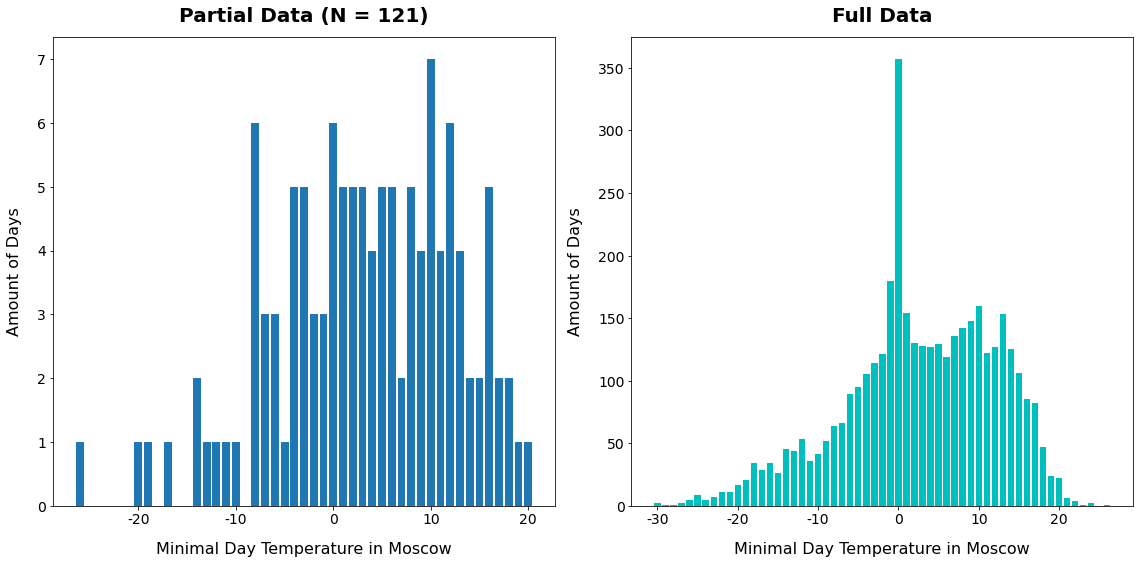

In [ ]:
import matplotlib.pyplot as plt

unique, counts = np.unique(sample_part, return_counts=True)
unique_full, counts_full = np.unique(sample_full, return_counts=True)
plt.rcParams['figure.figsize'] = (16, 8)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)

ax0.bar(unique, counts)
ax0.set_xlabel('Minimal Day Temperature in Moscow', labelpad=15)
ax0.set_ylabel('Amount of Days', labelpad=15)
ax0.set_title('Partial Data (N = 121)', pad=15, weight='bold')

ax1.bar(unique_full, counts_full, color='c')
ax1.set_xlabel('Minimal Day Temperature in Moscow', labelpad=15)
ax1.set_ylabel('Amount of Days', labelpad=15)
ax1.set_title('Full Data', pad=15, weight='bold')

fig.tight_layout()


## Part 2. Parameter estimation (6 points)
Find the following parameters' estimates and their 95% confidence intervals (except for `mode` and `skewness`). You need to show theoretical calculations (with intermediate steps) for estimates and intervals (with intermediate steps) and then make simulation.

### a) Mean and CI

We can estimate mean using $\delta$-method. As we know, from theory, the empirical analog of density function can be represented as $\delta$-function. 
 We also know, that 
$$<\delta, \phi> = \phi(0) $$
$$mean(x) = \int_{-\inf}^{\inf}xp(x)dx$$

the density function can be written as
$$\overline{p}(x;\epsilon^n)=\frac{1}{n}\sum_{i=1}^n \delta(x - \epsilon_i)$$

Knowing it, we can estimate the mean as
$$\overline{mean} = \int_{-\inf}^{\inf} x\cdot [ \frac{1}{n}\sum_{i=1}^n \delta(x-\epsilon_i)]dx =\frac{1}{n}\sum_{i=1}^n \int_{-\inf}^{\inf} x \cdot  \delta(x-\epsilon_i) dx = \frac{1}{n}\sum_{i=1}^n \epsilon_i  $$ 

where $\epsilon_i$ - observed values. 

After that we can estimate the CI. CI (by definition) is an interval, such that a random variable belongs to this interval with probability $\alpha$(here 95 %). From the central limit theorem we know, that the distribution of sampling means converges to normal distibution(if it has mean and limited variance).
$$<\epsilon_i> \sim N(\mu, \frac{\sigma^2}{n}) $$
Then
$$\sqrt{n} \frac{<\epsilon_i> - \mu}{\sigma} \sim N(0,1)$$
 So we can estimate a 95% CI as follow
$$\hat{mean} = \overline{x}\pm z\cdot\frac{\sigma}{\sqrt{n}}$$
where z - a special value from normal distribution with the given confidence level. For 95% it is equel to 1.96



$$ \hat{mean} = \frac{1}{n}\sum_{i=1}^n x_i  $$

$$ CI(\hat{mean}) = z\cdot\frac{\sigma}{\sqrt{n}}$$

In [ ]:
import scipy.stats as st

mean, (lower_mean, upper_mean) = np.mean(sample_part), st.norm.interval(alpha=0.95, loc=np.mean(sample_part), scale=np.std(sample_part)/np.sqrt(N))

f"Mean {mean:.3f} with confidence interval ({lower_mean:.3f}, {upper_mean:.3f})"

'Mean 3.174 with confidence interval (1.534, 4.814)'

### b) Median and CI

Here you can assume that PDF is continuous at the median point and provide a normal-based interval.

If PDF is continues, we can find the median as a root of equation
$$\int_{-\inf}^{y}p(x)dx = 0.5$$

Again, we can try to use delta-metod for solving this problem. To do it, we should approximate real density with observed density function.
$$\int_{-\inf}^{y}\overline{p}(x; \epsilon^n)dx=\int_{-\inf}^{y}\frac{1}{n}\sum_{i=1}^n \delta(x - \epsilon_i)dx =\frac{1}{n}\sum_{i=1}^n\int_{-\inf}^{y}  \delta(x - \epsilon_i)dx=\frac{1}{n}\sum_{i=1}^n \theta(y - \epsilon_i) = 0.5$$

Where $\theta$ - is  Heaviside step function. After that, we can change the order of our observations ( the sum wouldn't change after this step) so that $\epsilon_{i} < \epsilon_{i-1}$. In this case, there will be some number k: $\theta(y-\epsilon_i) = 0$, if i>k, and  $\theta(y-\epsilon_i) = 1$ if $i\leq k$. The sum then will be equel to k, and, finaly, we can write

$$k = [n\cdot 0.5]; y = \epsilon_k$$

here [x] means the the integer part of number, and $\epsilon_k$ is taken from sorted sampling. 



At first, we should assume that the PDF function is continuous at the median point(and also, not zero). 
Suppose we have a sampling: $x_1, x_2... , x_n$. Let’s make a new statistic: $I_1,I_2…, I_n$ such that I = 1 if $x_i <  x_{\alpha}$ and 0 otherwise. The average of I statistic will have normal distribution (according to CLT), with parametres:
$$\mu_I = <I> = \frac{1\cdot\alpha\cdot n  +0\cdot(1-\alpha)\cdot n}{n} = \alpha$$
$$\sigma = \frac{\alpha\cdot n(1-\alpha)^2+(1-\alpha)\cdot n\cdot\alpha^2}{n}=\alpha(1-\alpha)$$
As we are working with median, $\alpha = \frac{1}{2}$
After that we can apply the delta-method to obtain the distribution of the median of $x_n$. As a median is (by definition) a root of following equation:
$$F_x(x_{\alpha}) = \alpha$$
then
$$F_x^{-1}(\alpha) = x_{\alpha}$$
So we can apply the delta-method to estimate the parameters of distribution of medians 
$$\sqrt{n}(\hat{x}_{\alpha} - x_{\alpha}) \rightarrow N(0, \frac{\alpha(1-\alpha)}{p(x_{\alpha})^2}$$
So, we can estimate the confidence interval of the median:
$$x_{\frac{1}{2}} = \hat{x}_{\frac{1}{2}}\pm 1.96\cdot \sqrt{\frac{\alpha(1-\alpha)}{np(x_{\alpha})^2}} $$
$$\hat{median} =\epsilon_k; k = [n\cdot 0.5]$$
$$CI(\hat{median}) = (\epsilon_k - 1.96\cdot \sqrt{\frac{1)}{4n\overline{p}(\epsilon_{k})^2}}, \epsilon_k + 1.96\cdot \sqrt{\frac{1)}{4n\overline{p}(\epsilon_{k})^2}})$$

In [ ]:
median = np.median(sample_part)
p_med = counts[unique == median][0]

(lower_median, upper_median) = (np.median(sample_part) - 1.96/np.sqrt(4*N*p_med**2),
                  np.median(sample_part) + 1.96/np.sqrt(4*N*p_med**2))
f"Median {median:.3f} with normal-based confidence interval ({lower_median:.3f}, {upper_median:.3f})"

'Median 4.000 with normal-based confidence interval (3.978, 4.022)'

### c) Variance and CI

Here you can assume that the sample comes from a normal distribution, but the mean and variance are not known.

Let's estimate the parameter using method of maximal likelihood. We assume, that our sample consists of iid (independent and identically distributed) random variables. That's why we can write the function of likelihood as a  product of univariate density functions. 

$$f \sim N(a, \sigma^2) \Rightarrow f_n = \frac{1}{\sigma\sqrt{2\pi }}e^{-\frac{(x-a)^2}{2 \sigma^2}}$$
$$\theta = (a,\sigma)$$

$$L_n(\theta) = (\frac{1}{\sigma\sqrt{2\pi}})^ne^{-\frac{1}{2 \sigma^2}\cdot \sum_{i=1}^n(x_i-a)^2}$$

Take log of it:    
$$l_n(\theta) = -\frac{n}{2}ln(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum^{n}_{i=1}(x_i-a)^2$$

We can estimate the parametres as an argument at which the likelihood function have maximum

$$\hat{\theta} = argmax(l_n(\theta))$$

To find this estimation, we shoud find a point at which the derivative of likelihood function is equel to zero 

$$\frac{\partial l_n(a, \sigma)}{\partial a} = \frac{\sum^{n}_{i=1}(x_i-a)}{\sigma^2} = 0$$
$$\frac{\partial l_n(a, \sigma^2)}{\partial \sigma^2} = -\frac{n}{4\pi\sigma^2}+\frac{1}{2\sigma^2}\sum^{n}_{i=1}(x_i-a)^2 = 0$$

We have a system of two equations. From here we can get the estimation of parametres

$$a = <x> = \frac{\sum^n_{i=1}x_i}{n}$$ - sampling average
$$\sigma^2 = \frac{\sum^n_{i=1}(x_i-a)^2}{n}$$ - variance

Also we know, from Fisher's theorem for normal samplings that random variable 
$$\frac{(n-1)\hat{\sigma}^2}{\sigma^2}\sim \chi^2_{n-1}$$
has chi-square distribution with n-1 degrees of freedom, where $\hat{\sigma}$ - sampling dispertion. Also we know(from CLT), that the chi-square distribution can be approximated as a normal distribution $\sim N(n-1, 2(n-1))$. So, variance can be estimated as
$$\hat{\sigma}^2\sim N(\sigma^2,\frac{2\sigma^4}{n-1})$$

$$\hat{\sigma}^2 = \frac{\sum^n_{i=1}(x_i-a)^2}{n}$$ 
$$CI = (\hat{\sigma}^2- 1.96\frac{\sqrt{2}\hat{\sigma}^2}{\sqrt{ n-1}},\hat{\sigma}^2 +1.96\frac{\sqrt{2}\hat{\sigma}^2}{\sqrt{ n-1}})$$

In [ ]:
var = np.var(sample_part)
var_var = 2*var**2/(N-1)
(lower_var, upper_var) = (var - 1.96*np.sqrt(var_var),
                          var + 1.96*np.sqrt(var_var))
                                     
f"Square of variance {var:.3f} with confidence interval ({lower_var:.3f}, {upper_var:.3f})"

'Square of variance 84.722 with confidence interval (63.284, 106.160)'

### d) Mode (most frequent value in a sample)

In [ ]:
# Your code here

mode = ...
f"Mode: {mode}"

'Mode: Ellipsis'

### e) Skewness

In [ ]:
# Your code here

skewness = ...
f"Skewness: {skewness:e}"

TypeError: ignored

## Part 3. Bootstrap (4 points)

Find confidence intervals for following estimates using bootsrap. Use function `choice` with parameter `replace=True` for bootstrap sampling. Try different numbers of generated samples.

### a) Mean and CI

In [ ]:
repeats = 100

bootstrap = np.array([choice(sample_part, N, replace=True).mean() for i in range(repeats)])
mean_boot = bootstrap.mean()
(lower_mean_boot, upper_mean_boot) = ( 2 * mean_boot - np.quantile(bootstrap, 0.975), 
                                       2 * mean_boot - np.quantile(bootstrap, 0.025))
f"Mean {mean_boot:.3f} with confident interval ({lower_mean_boot:.3f}, {upper_mean_boot:.3f})"

'Mean 3.270 with confident interval (1.635, 4.683)'

### b) Median and CI

In [ ]:
bootstrap = np.array([np.median(choice(sample_part, N, replace=True)) for i in range(repeats)])
median_boot, (lower_med_boot, upper_med_boot) = np.median(bootstrap), (np.percentile(bootstrap, 2.5),np.percentile(bootstrap, 97.5))
f"Median {median_boot:.3f} with normal-based confident interval ({lower_med_boot:.3f}, {upper_med_boot:.3f})"

'Median 3.500 with normal-based confident interval (2.000, 6.000)'

### c) Variance and CI

In [ ]:
# Your code here
bootstrap = np.array([choice(sample_part, N, replace=True).var() for i in range(repeats)])
var_boot, (lower_var_boot, upper_var_boot) = bootstrap.mean(), (np.percentile(bootstrap, 2.5),np.percentile(bootstrap, 97.5))
f"Variance {var_boot:.3f} with confident interval ({lower_var_boot:.3f}, {upper_var_boot:.3f})"

'Variance 82.054 with confident interval (65.748, 102.240)'

## Part 4. Comparison with true values (1 point)

Compare with estimates calculated over full sample. Write conclusion about estimates and their confidence intervals obtained without and with bootstrap. Also, you can share some conclusions about moscow weather :)

In [ ]:
from scipy.stats import skew

mean_full = sample_full.mean()
median_full = np.median(sample_full)
var_full = sample_full.var()
moda_full = unique_full[counts_full == max(counts_full)]
skewness_full = skew(sample_full)

In [ ]:
print(mean, mean_full)

3.1735537190082646 2.615617892342684


## Part 5. Confidence intervals and sample size (8 points)

Compare the size of confidence intervals **for the mean** obtained without and with bootstrap. Additionally, compare the empirical coverage of different confidence intervals (by generating sufficient number of samples of corresponding size and calculating proportion of cases when the interval covers the mean of the full sample). Consider sizes `[42, 84, 168, 335, 670, 1340]`. Plot results and make conclusion about their accuracy.

In [ ]:
def boot_estimates(estimator, X, num_resamples=1000):
    estimates = np.empty(num_resamples)
    for i in range(num_resamples):
        estimates[i] = estimator(np.random.choice(X, size=len(X), replace=True))
    return estimates

In [ ]:
def normal_interval(estimates, level=0.95):
    alpha = 1 - level
    s_boot = estimates.std()
    z = scipy.stats.norm.ppf(1 - alpha/2)
    m = estimates.mean()
    return m - z * s_boot, m + z * s_boot

In [ ]:
def boot_interval(estimates, level=0.95):
    alpha = 1 - level
    m = estimates.mean()
    return 2 * m - np.quantile(estimates, 1 - alpha), 2 * m - np.quantile(estimates, alpha)

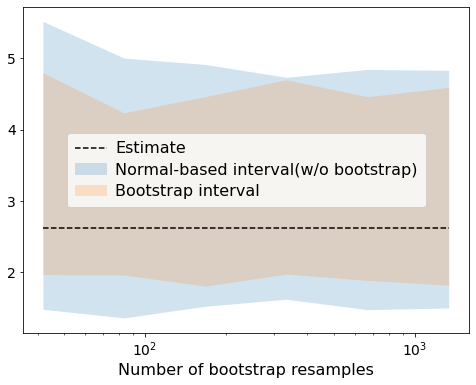

In [ ]:
seed(476)
sizes = np.r_[42, 84, 168, 335, 670, 1340]
wo_boot_ints = np.empty((len(sizes), 2))
boot_ints = np.empty_like(wo_boot_ints)
for i, s in enumerate(sizes):
    wo_boot_ints[i] = normal_interval(boot_estimates(np.mean, sample_part, num_resamples=s))
    boot_ints[i] = boot_interval(boot_estimates(np.mean, sample_part, num_resamples=s))

plt.figure(figsize=(8, 6))
plt.fill_between(sizes, wo_boot_ints[:, 0], wo_boot_ints[:, 1], alpha=0.2, label='Normal-based interval(w/o bootstrap)')
plt.fill_between(sizes, boot_ints[:, 0], boot_ints[:, 1], alpha=0.2, label='Bootstrap interval')
#plt.fill_between(sizes, [exact_int[0]] * len(sizes), [exact_int[1]] * len(sizes), alpha=0.2, label='Exact interval')
plt.plot(sizes, [sample_full.mean()]*len(sizes), 'k--', label='Estimate')
plt.xscale('log')
plt.xlabel('Number of bootstrap resamples')
plt.legend(loc='center')

From this plot we can see that:

1) The real value is included in all confidence intervals; 

2) Both intervals don't change significantly with the increase of the amont of observations in sampling; 

3) Bootstrap CI is less then normal-based one. 

Also we can see, that teampriture in Moscow is quite low, because the average year tempirature is only 2.6 C 



In [ ]:
def get_cov_prob(y_pred, y_lower, y_upper, y_true, rtol=1.e-4, atol=1.e-6):
    """
    Calculate coverage probability given true output, predicted mean and confidence limits.
    Additionally check if prediction is very close to the true output.
    """
    n_cov = (((y_true >= y_lower) & (y_true <= y_upper))
                 | np.isclose(y_pred, y_true, rtol=rtol, atol=atol)) \
        .astype(float)
    p_cov = np.mean(n_cov)
    return n_cov.sum().astype(int), p_cov

In [ ]:
num_repeats = 300

n_cov_norm = np.empty(len(sizes))
p_cov_norm = np.empty_like(n_cov_norm)
n_cov_boot = np.empty_like(n_cov_norm)
p_cov_boot = np.empty_like(n_cov_norm)

for i, s in enumerate(sizes):
    boot_ints = np.empty((num_repeats, 2))
    normal_ints = np.empty((num_repeats, 2))
    estimates = np.empty(num_repeats)
    for j in range(num_repeats):
        sample_part = np.random.choice(sample_full, 121, replace=False)
        estimates[j] = sample_part.mean()
        boot_ints[j] = boot_interval(boot_estimates(np.mean, sample_part, num_resamples=s))
        normal_ints[j] = normal_interval(boot_estimates(np.mean, sample_part))
    n_cov_boot[i], p_cov_boot[i] = get_cov_prob(estimates, boot_ints[:, 0], boot_ints[:, 1], mean_full)
    n_cov_norm[i], p_cov_norm[i] = get_cov_prob(estimates, normal_ints[:, 0], normal_ints[:, 1], mean_full)

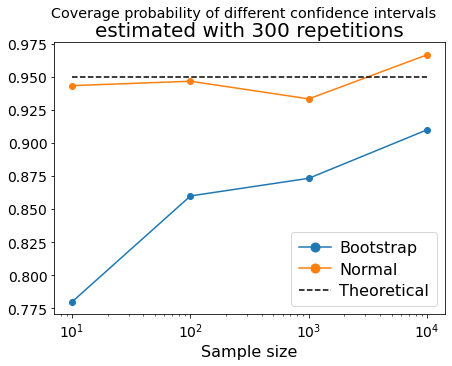

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(sizes, p_cov_boot, '-o', label='Bootstrap')
plt.plot(sizes, p_cov_norm, '-o', label='Normal')
plt.plot(sizes, [0.95] * len(sizes), 'k--', label='Theoretical')
plt.xscale('log')
plt.suptitle(f'Coverage probability of different confidence intervals')
plt.title(f'estimated with {num_repeats} repetitions')
plt.xlabel('Sample size')
plt.legend()

From this plot we can see, that normal-based interval coverges to the theoretical value. Moreover, in main cases it larger then the theoretical one. 
## Conclusion 

From this two plots we can see, that both method can estimate the mean value quite well: on the first plot we can see, that the true mean belongs to confidence intervals obtained by both methods. Also we can see, that the CI of bootstrap method is less than the normal-based one, but, nevertheless, it has a worse convergance. 

# Task 2. Currency in RC-circuit (25 points)

In this part you need to estimate parameters and apply delta method. 

First of all, you will need some libraries. Also, fix random seed to get reproducible results.

In [ ]:
import numpy as np
import scipy
from scipy.stats import norm, uniform
from numpy.random import choice, seed

seed(100)

## Part 1. Estimate parameters (4 points)

Assume that there is an RC-circuit with a capacitor and a resistor. 
<img src="circuit.png" width="200"  class="center">

We charge the capacitor until it reaches voltage $V$ and measure current intensity. In this case voltage on the capacitor yields the formula for exponential decay:

$$ V_C(t) = V e^{-\frac{t}{RC}} $$

Let's assume that voltage $V$ and resistence $R$ are independent and belong to the following distributions:

### a) 
$V \sim \mathcal{N}(4, 1)$, 

$R \sim \mathcal{U}(6, 11)$


Consider **true values** for $V$ and $R$ to be the means of the corresponding distributions.

Generate sample for $V$ of size 100. Apply maximum likelihood to estimate the mean. Show theoretical calculations for the estimates (with intermediate steps) and make simulation.


Here I suppose, that (6, 11) - the interval from which we take our observation (loc and scale in scipy will be 6 and 5).

Statistical model is
$$V_i = \mu + \epsilon_i$$
where $\mu$ - real value, $V_i$ - observed values, $\epsilon_i$ - errors of the estimations, wich are distributed normally with zero mean. Then, applying $\delta$-method to the function of likelyhood, we can find the estimation of a mean as an argument, where the likelihood function has maximum
$$\overline{L}(\hat{\mu}, V^n) = - \frac{1}{2\sigma^2}\sum^{n}_{i=1}[V_i -\hat{\mu}] - \frac{nlog(2\pi\sigma^2)}{2}$$
$$\frac{\overline{L}(\hat{\mu}, V^n) }{d\mu}\Big{|}_{max} = \sum^{n}_{i=1}[V_i -\hat{\mu(V_n)}] = 0$$
$$\mu(\hat{V_n}) = \frac{1}{n}\sum^{n}_{i=1}V_i$$

In [ ]:
N_sam = 100
V = norm(loc = 4, scale = 1).rvs(size=N_sam)

Generate sample for $R$ on size 100. Apply maximum likelihood to estimate the mean. Show theoretical calculations for estimates (with intermediate steps) and make simulation.

$$\hat{R}_{n} = \frac{R_{(n)} + R_{(1)}}{2}$$

Statistical model
$$R = \mu +\epsilon_i$$
where $\mu$ - real value, $R_i$ - observed values, $\epsilon_i$ - errors of the estimations, wich are distributed uniformly with zero mean. Errors(and values themselves) have following density 
$$
p(x;\sigma) = \left\{
    \begin{array}\\
        (2\sigma)^{-1} & \mbox{if } \ | x | \ge \sigma \\
        0 & \mbox{if } \ |x| < \sigma
    \end{array}
\right.
$$
Applying $\delta$-method to the function of likelyhood we get
$$L(\hat{\mu}; R^n) = \sum_{i=1}^n log[p(R_i - \hat{\mu})] $$
$$
 = \left\{
    \begin{array}\\
        - n log(\sigma) & \mbox{if } \ R_i  \in [ \overline{R} - \sigma, \overline{R}   + \sigma ]  \\
        -\inf & \mbox{if } \ R_i  \notin [ \overline{R}  - \sigma,\overline{R}   + \sigma ]
    \end{array}
\right.
$$
We see here, that this function is partialy-constant, and maximum value can be reached at any point from interval $[ R_{min} , R_{max} ]$. So as an estimate of a mean we can take the midle of this interval
$$\hat{\mu} = \frac{R_{max} + R_{min}}{2}$$


In [ ]:
# Your code here
R = uniform(loc = 6, scale = 5).rvs(size=N_sam)

In [ ]:
V_est = V.mean()
V_var = V.var()
R_est = (R.min() + R.max())/2
R_var = (R.max() - R.min())**2/12

## Part 2. Apply delta method (8 points)

Assume, that we measure current intensity after 1 second. Let's take $C = 1$. In this case we get the following simplified formula:

$$I = \frac{V}{R} e^{-\frac{1}{R}}.$$

Find estimate for current and it's confidence interval. Show theoretical calculations for estimates (with intermediate steps) and make simulation.


$$\tau = g(\hat{V}, \hat{R}) = \frac{\hat{V}}{\hat{R}}e^{-\frac{1}{\hat{R}}}$$

On the lecture we calculated fisher information to obtain the variances and calculate se. In this task I failed to compute the distribution of I (I recieved non-irregular integral while calculating the common distribution of parametres). So I assume, that all our observations are iid, so we can write a function of likelihood will be the product of pdf at observation point. After that we take logarythm, wich turnes the product into sum. Taking partial derivative in this case will 'kill' the parts from different distributions, so we'll just achieve the variations of initial distributions. We have estimated dispersion of the normal distribution in the previous step, and for uniform one we can estimate it in this way

$$\sigma_R^2 = E(V^2) - E(V)^2 = \int_a^b \frac{x^2}{b-a}dx  - (\int_a^b \frac{x}{b-a}dx)^2 = \frac{1}{12}(4b^2+4ab+4a^2-3b^2-6ab-3a^2)  = \frac{(b-a)^2}{12}$$
$\sigma_v^2 $ is estimated in previous step

\begin{equation*}
J_n  = \frac{1}{n}
\begin{pmatrix}
\sigma_V^2 & 0 \\
0 & \frac{\sigma_R^2}{12}  
\end{pmatrix}
\end{equation*}
\begin{equation*}
\nabla g  = 
\begin{pmatrix}
1 \\
-V\frac{1-R}{R^3}e^{-\frac{1}{R}}  
\end{pmatrix}
\end{equation*}
$$\hat{se}(\hat{\tau}) = \sqrt{(\hat{\nabla g })^TJ_n(\hat{\nabla g})} = \frac{1}{\sqrt{n}}\sqrt{\sigma_v^2+\frac{\sigma_R^2}{12}(V\frac{1-R}{R^3}e^{-\frac{1}{R}})^2}$$

$$\hat{I}_n = \frac{\hat{V}}{\hat{R}}e^{-\frac{1}{\hat{R}}}$$

$$ CI(\hat{I}_n) = (\hat{I}_n - 1.96\cdot\hat{se}, \hat{I}_n + 1.96\cdot\hat{se})$$
where 
$$\hat{se} = \frac{1}{\sqrt{n}}\sqrt{\sigma_v^2+\frac{\sigma_R^2}{12}(V\frac{1-R}{R^3}e^{-\frac{1}{R}})^2}$$


In [ ]:
I_est = V_est/R_est*np.exp(-1/R_est)
se = 1/np.sqrt(N_sam)*np.sqrt(V_var + R_var*(V_est*(1-R_est)/R_est**3*np.exp(-1/R_est))**2)

(lower_I, upper_I) = (I_est - 1.96*se,
                      I_est + 1.96*se)
                                     
f"Power of current {I_est:.3f} with confidence interval ({lower_I:.3f}, {upper_I:.3f})"


'Power of current 0.407 with confidence interval (0.221, 0.594)'

## Part 3. Non-parametric bootstrap estimation (2 points)

Estimate confidence interval for $I$ using non-parametric bootstrap.

In [ ]:
N_sam = 100
V_s = [choice(V, len(V), replace=True) for i in range(N_sam)]
R_s = [choice(R, len(R), replace=True) for i in range(N_sam)]
I_s = np.array([V_s[i].mean()/R_s[i].mean()*np.exp(-1/R_s[i].mean()) for i in range(N_sam)])
I_boot = I_s.mean()

#v_boot = 1/N_sam*np.sum((I_s - I_boot)**2)
#se = np.sqrt(v_boot/N_sam)
#CI_low, CI_high = (2*I_boot -1.96*se, 2*I_boot + 1.96*se)

#f"SE for non-parametric bootstrap: {se:e}"

In [ ]:
I_s_sort = np.sort(I_s)
conf = 0.95
low = int(N_sam * (1 - (1 - conf)/2))
up = int(N_sam * (1 - conf)/2) 

I_low = I_boot*2 - I_s_sort[low]
I_up = I_boot*2 - I_s_sort[up]
f"Power of current {I_boot:.3f} with confidence interval ({I_low:.3f}, {I_up:.3f})"

'Power of current 0.411 with confidence interval (0.382, 0.436)'

## Part 4. Parametric bootstrap estimation (3 points)

Estimate confidence interval for $I$ using parametric bootstrap.

As we have estimations of parametres of our distributions in the first part of this task. 

In [ ]:
V_boot_par = norm(loc = V_est, scale = V_var).rvs(size=N_sam)
R_boot_par = uniform(loc = R.min(), scale = R.max()-R.min()).rvs(size=N_sam)
V_s = [choice(V_boot_par, len(V_boot_par), replace=True) for i in range(N_sam)]
R_s = [choice(R_boot_par, len(R_boot_par), replace=True) for i in range(N_sam)]
I_s = np.array([V_s[i].mean()/R_s[i].mean()*np.exp(-1/R_s[i].mean()) for i in range(N_sam)])
I_boot = I_s.mean()

I_s_sort = np.sort(I_s)
conf = 0.95
low = int(N_sam * (1 - (1 - conf)/2))
up = int(N_sam * (1 - conf)/2) 

I_low = I_boot*2 - I_s_sort[low]
I_up = I_boot*2 - I_s_sort[up]
f"Power of current {I_boot:.3f} with confidence interval ({I_low:.3f}, {I_up:.3f})"


#v_boot = 1/M*np.sum((I_s - I_boot)**2)
#se = np.sqrt(v_boot/N_sam)
#f"SE for parametric bootstrap: {se:e}"

'Power of current 0.403 with confidence interval (0.382, 0.419)'

## Part 5. Compare results (8 points)

Compare the size of confidence intervals obtained using delta method, parametric and non-parametric bootstrap. Additionally, compare the empirical coverage of different confidence intervals (by generating sufficient number of samples of corresponding size and calculating proportion of cases when the interval covers the true value for the current $I$). Consider sizes `[1e1, ..., 1e4]`. Plot results and make conclusion about their accuracy.

In [ ]:
sizes = np.logspace(1, 4, 4).astype(np.int)
N_sam = 10000
V = norm(loc = 4, scale = 1).rvs(size=N_sam)
R = uniform(loc = 6, scale = 5).rvs(size=N_sam)

In [ ]:
def I(V_s, R_s):
  return V_s.mean()/R_s.mean()*np.exp(-1/R_s.mean())


In [ ]:
def boot_estimates(X, Y, num_resamples=1000):
    estimates = np.empty(num_resamples)
    for i in range(num_resamples):
        estimates[i] = I(np.random.choice(X, size=len(X), replace=True), np.random.choice(Y, size=len(Y), replace=True))
    return estimates

In [ ]:
def boot_interval(estimates, level=0.95):
    alpha = 1 - level
    m = estimates.mean()
    return 2 * m - np.quantile(estimates, 1 - alpha/2), 2 * m - np.quantile(estimates, alpha/2)

In [ ]:
def delta_interval(V, R, level=0.95):
    alpha = 1 - level
    V_est = V.mean()
    V_var = V.var()
    R_est = (R.min() + R.max())/2
    R_var = (R.max() - R.min())**2/12
    s_boot = 1/np.sqrt(len(V))*np.sqrt(V_var + R_var*(V_est*(1-R_est)/R_est**3*np.exp(-1/R_est))**2)
    z = scipy.stats.norm.ppf(1 - alpha/2)
    m = V_est/R_est * np.exp(-1/R_est)
    return m - z * s_boot, m + z * s_boot

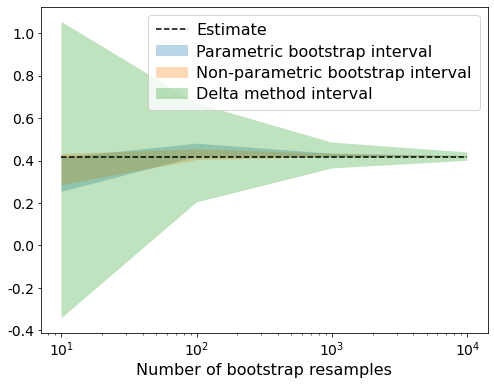

In [ ]:
# Compare size of confidence intervals obtained using delta method, parametric and non-parametric bootstrap
seed(476)
param_boot_ints = np.empty((len(sizes), 2))
boot_ints = np.empty_like(param_boot_ints)
delta_ints = np.empty_like(param_boot_ints)
R_true = (R.min()+R.max())/2
I_true = V.mean()/R_true*np.exp(-1/R_true)


for i, s in enumerate(sizes):
   
    V_part = choice(V, s, replace=False)
    R_part = choice(R, s, replace=False)
    V_est = V_part.mean()
    V_var = V_part.std()
    R_est = (R_part.min() + R_part.max())/2
    R_var = (R_part.max() - R_part.min())**2/12
    param_boot_ints[i] = boot_interval(boot_estimates(norm(loc = V_est, scale = V_var).rvs(size=s),
                                                      uniform(loc = R_part.min(), scale = R_part.max()-R_part.min()).rvs(size=s), 
                                                      num_resamples=100))
    boot_ints[i] = boot_interval(boot_estimates(V_part, R_part, num_resamples=100))
    delta_ints[i] = delta_interval(V_part, R_part)

plt.figure(figsize=(8, 6))
plt.fill_between(sizes, param_boot_ints[:, 0], param_boot_ints[:, 1], alpha=0.3, label='Parametric bootstrap interval')
plt.fill_between(sizes, boot_ints[:, 0], boot_ints[:, 1], alpha=0.3, label='Non-parametric bootstrap interval')
plt.fill_between(sizes, delta_ints[:, 0], delta_ints[:, 1], alpha=0.3, label='Delta method interval')
#plt.fill_between(sizes, [exact_int[0]] * len(sizes), [exact_int[1]] * len(sizes), alpha=0.2, label='Exact interval')
plt.plot(sizes, [I_true]*len(sizes), 'k--', label='Estimate')
plt.xscale('log')
plt.xlabel('Number of bootstrap resamples')
plt.legend(loc='best')


From this plot we can see that:

1) Delta method has a larger confidence interval, but it always contains the true value. Also we see, that this confidence interval decreaes with the rise of amount of samples. This corresponds to the theory;

2) Parametric and non-parametric bootstrap methods have less confidence interval, but they sometimes don't include real value


In [ ]:
num_repeats = 300

n_cov_delta = np.empty(len(sizes))
p_cov_delta = np.empty_like(n_cov_delta)
n_cov_boot = np.empty_like(n_cov_delta)
p_cov_boot = np.empty_like(n_cov_delta)
n_cov_param_boot = np.empty_like(n_cov_delta)
p_cov_param_boot = np.empty_like(n_cov_delta)

for i, s in enumerate(sizes):
    boot_ints = np.empty((num_repeats, 2))
    param_boot_ints = np.empty((num_repeats, 2))
    delta_ints = np.empty((num_repeats, 2))
    estimates = np.empty(num_repeats)
    for j in range(num_repeats):
        V_part = np.random.choice(V, s, replace=False)
        R_part = np.random.choice(R, s, replace=False)
        V_est = V_part.mean()
        V_var = V_part.var()
        R_est = (R_part.min() + R_part.max())/2
        R_var = (R_part.max() - R_part.min())**2/12

        estimates[j] = V_part.mean()/R_part.mean()*np.exp(-1/R_part.mean())
        boot_ints[j] = boot_interval(boot_estimates(V_part, R_part, num_resamples=100))
        param_boot_ints[j] = boot_interval(boot_estimates(norm(loc = V_est, scale = V_var).rvs(size=s),
                                                      uniform(loc = R_est-R_var/2, scale = R_var).rvs(size=s), 
                                                      num_resamples=100))
        delta_ints[j] = delta_interval(V_part, R_part)
    n_cov_boot[i], p_cov_boot[i] = get_cov_prob(estimates, boot_ints[:, 0], boot_ints[:, 1], I_true)
    n_cov_param_boot[i], p_cov_param_boot[i] = get_cov_prob(estimates, param_boot_ints[:, 0], param_boot_ints[:, 1], I_true)
    n_cov_delta[i], p_cov_delta[i] = get_cov_prob(estimates, delta_ints[:, 0], delta_ints[:, 1], I_true)

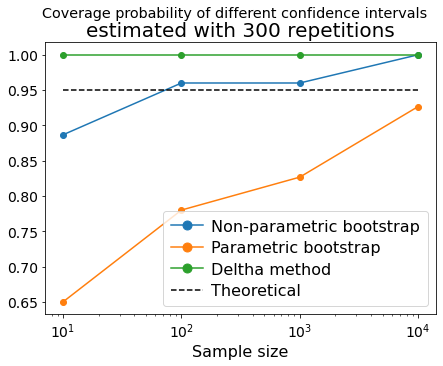

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(sizes, p_cov_boot, '-o', label='Non-parametric bootstrap')
plt.plot(sizes, p_cov_param_boot, '-o', label='Parametric bootstrap')
plt.plot(sizes, p_cov_delta, '-o', label='Deltha method')
plt.plot(sizes, [0.95] * len(sizes), 'k--', label='Theoretical')
plt.xscale('log')
plt.suptitle(f'Coverage probability of different confidence intervals')
plt.title(f'estimated with {num_repeats} repetitions')
plt.xlabel('Sample size')
plt.legend(loc='best')

Here we also can see the prove of our previous conclusion: deltha-method has a better coverage, but it is more exact(have a better coverage). But, however, all three methods increase their coverage with the increase of the amount of samples. 

Your conclusion:

Here we have compared three methods
- delta method. From the observations, it has the largest confidence interval. But this intervals always contained "true" values. Also, here we had to do more calculations, but after that less computations than in other methods;
- non-parametric bootstrap interval. It has pretty the same confidence interval as a parametric bootstrap method, but it has a better coverage; 
- parametric bootstrap. Has the worse coverage, but, at the end, it also converges to theoretical value. It can be caused by the fact that we don't use the observed values.   


P.S.: I did my best to complete this task. I did it myself, but with the use of some literature and web-sites for better understanding. Here I'll list this sources
- Лагутин М. Б., "Наглфдная математическая статистика"
- Голубев Г. К., "ВВЕДЕНИЕ В МАТЕМАТИЧЕСКУЮ СТАТИСТИКУ. Конспект лекций"
- stackexchange 
